In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/user_profiles-1.zip" -d /content/unzipped_folder

Archive:  /content/drive/MyDrive/user_profiles-1.zip
  inflating: /content/unzipped_folder/user_profiles_for_ads.csv  
  inflating: /content/unzipped_folder/__MACOSX/._user_profiles_for_ads.csv  


# 1. Processing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/unzipped_folder/user_profiles_for_ads.csv"

df = pd.read_csv(file_path)

----- 1.1 Check for noisy data and missing values -----



In [4]:
# Check the DataFrame

df.head(10)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."
5,6,25-34,Female,Suburban,Hindi,Master,6203,257,Mobile + Desktop,3.8,3.3,0.209,0.048,44,100k+,"Gourmet Cooking, Software Engineering, Eco-Fri..."
6,7,18-24,Female,Suburban,Hindi,Bachelor,1573,136,Mobile + Desktop,2.8,7.9,0.172,0.068,8,100k+,"Gardening, Digital Marketing, Music Production"
7,8,55-64,Male,Suburban,Hindi,PhD,3343,272,Desktop Only,2.7,1.9,0.128,0.032,35,40k-60k,"Music Production, Photography, Gaming, Travel ..."
8,9,45-54,Female,Urban,Spanish,High School,2281,49,Mobile + Desktop,1.0,3.2,0.115,0.008,159,20k-40k,"Eco-Friendly Living, Gardening"
9,10,45-54,Male,Rural,Hindi,Bachelor,9741,421,Mobile + Desktop,2.3,4.4,0.161,0.058,157,100k+,"Digital Marketing, Travel and Adventure"


In [5]:
# Check distributions of each continuous feature

df.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


- One thing I notice here is the min and max of Likes and Reactions are very different, it ranges from 101 to 9973. I want to look further into this feature by using a boxplot so detect outliers. Also, looking at the standard deviation, which is aound 2800, it tells me that this feature may not have outliers, but the data is very sparse.

- Numeric data that weren't normalized yet such as: Likes and Reactions, Followed Accounts, Time Spent Online weekday, Time Spent Online weekend, Ad Interaction Time needed to be scaled.

In [6]:
# Check all data including categorical and numeric

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

- This dataset has no missing value, so it's good to move on to the next step - plotting

- I want to start by looking at how some key features relate to Likes and Reactions, CTR (Click-Through Rates), and Conversion Rates, since those are our main success metrics. Understanding these relationships should give a better sense of user engagement patterns before moving into clustering.

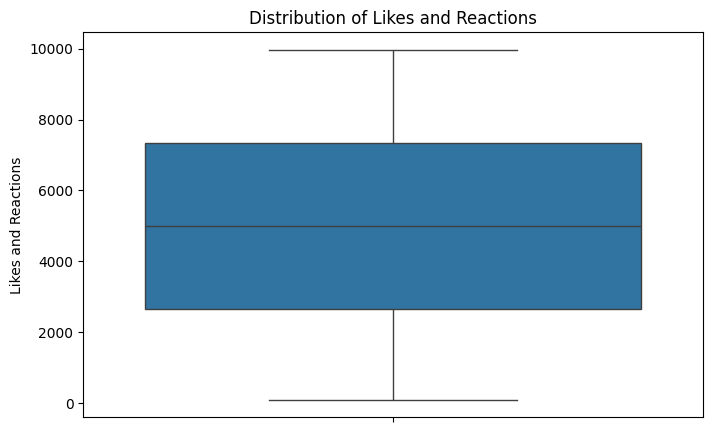

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Likes and Reactions')
plt.title('Distribution of Likes and Reactions')
plt.show()

- The median (around 5,000) of Likes and Reactions sits roughly in the middle of the range, suggesting a fairly balanced distribution not heavily skewed. There don’t appear to be strong outliers, since there are no individual points plotted outside the whiskers. That suggests the variation is natural, not driven by anomalies.

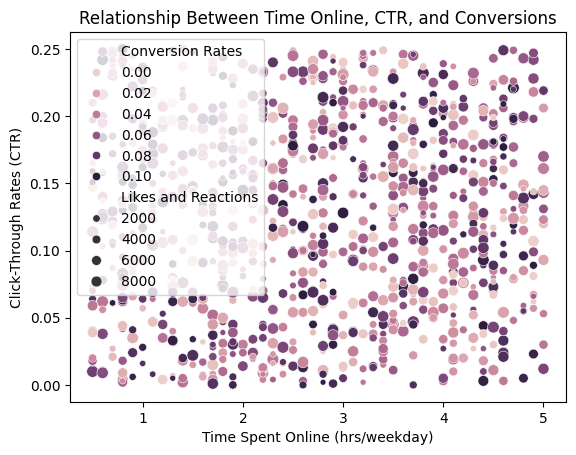

In [8]:
sns.scatterplot(x='Time Spent Online (hrs/weekday)',
                y='Click-Through Rates (CTR)',
                size='Likes and Reactions',
                hue='Conversion Rates',
                data=df)
plt.title('Relationship Between Time Online, CTR, and Conversions')
plt.show()

- The scatterplot between Time Spent Online (hrs/weekday), CTR, and Conversion Rates doesn’t reveal any strong visible relationships. The data points are widely spread, suggesting that user engagement and conversion behavior may depend on other factors or more complex interactions not captured in a single 2D plot.

- This disproves one thing that from our common sense that users spending more time on the app may react more to the ads. However, the plot suggests that there is no strong connection between them.

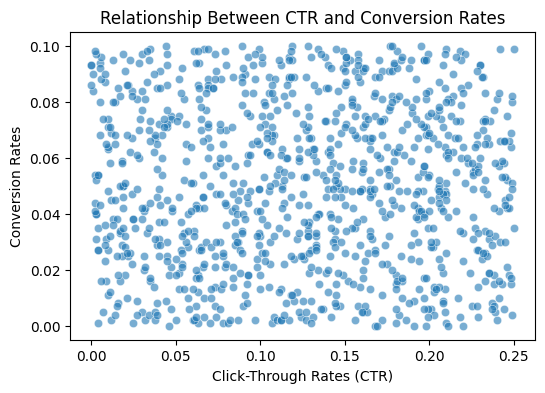

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Click-Through Rates (CTR)',
                y='Conversion Rates',
                data=df, alpha=0.6)
plt.title('Relationship Between CTR and Conversion Rates')
plt.xlabel('Click-Through Rates (CTR)')
plt.ylabel('Conversion Rates')
plt.show()


- There doesn’t seem to be a strong relationship between CTR and Conversion Rates here.

**----- 1.2 Standardization and One-hot encode categorical features -----**


In [10]:
# Separate categorical and numeric columns

numeric_cols = ['Likes and Reactions',
                'Followed Accounts',
                'Time Spent Online (hrs/weekday)',
                'Time Spent Online (hrs/weekend)',
                'Ad Interaction Time (sec)']


- One-hot encode categorical features: this will turn each category into a separate binary (0/1) column.

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

df_copy = df.copy()

# Split the 'Top Interests' column into lists
df_copy['Top Interests'] = df_copy['Top Interests'].str.split(', ')

# Use MultiLabelBinarizer to one-hot encode those lists
mlb = MultiLabelBinarizer()
interests_encoded = pd.DataFrame(
    mlb.fit_transform(df_copy['Top Interests']),
    columns=[f"Interest_{c}" for c in mlb.classes_]
)

# Drop the original 'Top Interests' column
df_copy = df_copy.drop('Top Interests', axis=1)

# Combine back the encoded interests with the rest of the DataFrame
df_combined = pd.concat([df_copy, interests_encoded], axis=1)

# Define your other categorical columns (exclude 'Top Interests' now)
categorical_cols = ['Age', 'Gender', 'Location', 'Language',
                    'Education Level', 'Device Usage', 'Income Level']

# One-hot encode the remaining categorical columns
df_encoded = pd.get_dummies(df_combined, columns=categorical_cols, drop_first=True)

# Convert True/False to 0/1 for readability
df_encoded = df_encoded.astype(int)

df_encoded.head()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Interest_DIY Crafts,Interest_Data Science,...,Education Level_PhD,Education Level_Technical,Device Usage_Mobile + Desktop,Device Usage_Mobile Only,Device Usage_Tablet,Income Level_100k+,Income Level_20k-40k,Income Level_40k-60k,Income Level_60k-80k,Income Level_80k-100k
0,1,5640,190,4,1,0,0,25,0,0,...,0,1,0,1,0,0,1,0,0,0
1,2,9501,375,0,7,0,0,68,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,4775,187,4,5,0,0,80,0,0,...,0,1,0,1,0,0,0,0,1,0
3,4,9182,152,3,4,0,0,65,1,0,...,1,0,0,0,0,1,0,0,0,0
4,5,6848,371,2,3,0,0,99,0,0,...,0,1,0,1,0,0,1,0,0,0


In [12]:
# This ensures the table is easier to read, with 0 means False and 1 means True
df_encoded = df_encoded.astype(int)

df_encoded.head()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Interest_DIY Crafts,Interest_Data Science,...,Education Level_PhD,Education Level_Technical,Device Usage_Mobile + Desktop,Device Usage_Mobile Only,Device Usage_Tablet,Income Level_100k+,Income Level_20k-40k,Income Level_40k-60k,Income Level_60k-80k,Income Level_80k-100k
0,1,5640,190,4,1,0,0,25,0,0,...,0,1,0,1,0,0,1,0,0,0
1,2,9501,375,0,7,0,0,68,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,4775,187,4,5,0,0,80,0,0,...,0,1,0,1,0,0,0,0,1,0
3,4,9182,152,3,4,0,0,65,1,0,...,1,0,0,0,0,1,0,0,0,0
4,5,6848,371,2,3,0,0,99,0,0,...,0,1,0,1,0,0,1,0,0,0


- Standardize numeric columns: all features have mean = 0 and standard deviation as 1.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Likes and Reactions              1000 non-null   float64
 2   Followed Accounts                1000 non-null   float64
 3   Time Spent Online (hrs/weekday)  1000 non-null   float64
 4   Time Spent Online (hrs/weekend)  1000 non-null   float64
 5   Click-Through Rates (CTR)        1000 non-null   int64  
 6   Conversion Rates                 1000 non-null   int64  
 7   Ad Interaction Time (sec)        1000 non-null   float64
 8   Interest_DIY Crafts              1000 non-null   int64  
 9   Interest_Data Science            1000 non-null   int64  
 10  Interest_Digital Marketing       1000 non-null   int64  
 11  Interest_Eco-Friendly Living     1000 non-null   int64  
 12  Interest_Fashion Mode

In [15]:
df_encoded.describe().T.head(10)  # Check mean/std values

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,5.005000e+02,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Likes and Reactions,1000.0,5.861978e-17,1.000500,-1.725751,-0.823325,0.001909,0.828905,1.753890
Followed Accounts,1000.0,8.526513e-17,1.000500,-1.701819,-0.884172,-0.041855,0.885046,1.737936
Time Spent Online (hrs/weekday),1000.0,-1.172396e-16,1.000500,-1.720947,-0.963821,-0.206695,0.550431,2.064682
Time Spent Online (hrs/weekend),1000.0,1.065814e-16,1.000500,-1.550769,-1.056106,-0.066780,0.922547,1.911873
Click-Through Rates (CTR),1000.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Conversion Rates,1000.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ad Interaction Time (sec),1000.0,4.973799e-17,1.000500,-1.679061,-0.887372,-0.027685,0.890286,1.701404
Interest_DIY Crafts,1000.0,1.480000e-01,0.355278,0.000000,0.000000,0.000000,0.000000,1.000000
Interest_Data Science,1000.0,1.470000e-01,0.354283,0.000000,0.000000,0.000000,0.000000,1.000000


- User ID is just an identifier and it isn't used for learning the clustering, so we need to drop it

In [16]:
df_encoded = df_encoded.drop(columns=['User ID'])

# 2. Model Training

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

- Apply PCA for dimensionality reduction since after 1 hot encoding, there are 47 features in the dataset

- The choice of n_components = 0.95 meaning that I want to keep enough components to explain 95% of total variance in the dataset

In [18]:
# Implement PCA using PCA library

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(df_encoded)

print("Original dimensions:", df_encoded.shape[1])
print("Reduced dimensions:", X_pca.shape[1])

Original dimensions: 46
Reduced dimensions: 35


- Scikit-learn's K-Means uses K-Means++ by default, so I don't need to implement it from scratch.

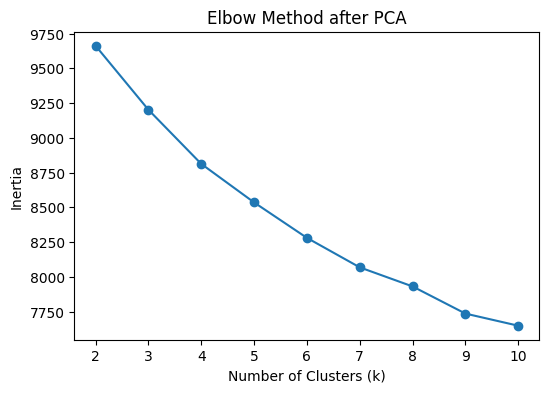

In [19]:
# Implement built-in K-Means ALgorithm

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Print the Scree graph to visually choose number of k

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method after PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Double check if k = 5 is an optimal k

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.070
k=3, silhouette score=0.060
k=4, silhouette score=0.061
k=5, silhouette score=0.058
k=6, silhouette score=0.057
k=7, silhouette score=0.057
k=8, silhouette score=0.055
k=9, silhouette score=0.058
k=10, silhouette score=0.055


# 3. Evaluation based on Training Result

In [21]:
# Run K-Means on PCA-Reduced Data

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_pca)

In [22]:
# Store Cluster Labels
df_clusters = df.copy()
df_clusters['Cluster'] = labels

- Visualize and interpret how K-Means algorithm segmented users, using the first two principal components from PCA as a 2D view of the data.

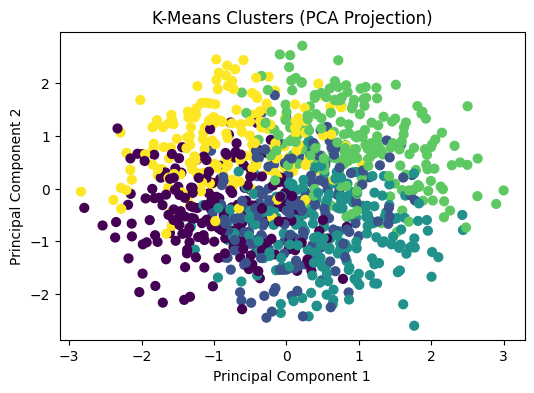

In [23]:
# Visualize Clusters Using PCA Projection

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


- This line calculates the average value of each numerical feature within each cluster.

In [24]:
df_clusters.groupby('Cluster').mean(numeric_only=True)

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
Cluster,,,,,,,,
0,517.881773,3870.152709,125.975369,2.409852,4.237438,0.129059,0.051621,136.128079
1,497.909091,2257.704545,284.096591,2.443750,3.776136,0.126869,0.051261,47.852273
2,512.027778,6702.861111,141.125000,3.313889,4.570370,0.120931,0.049671,53.666667
3,482.122727,7648.036364,364.854545,2.068636,4.481364,0.132550,0.049086,93.009091
4,492.286486,3695.681081,351.962162,3.607027,5.965946,0.116341,0.047438,126.027027


- This plot tells us how much of our dataset's variance is captured when we add more PCs.

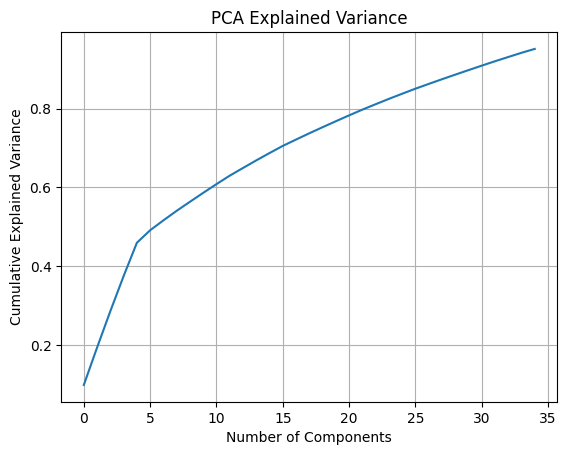

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

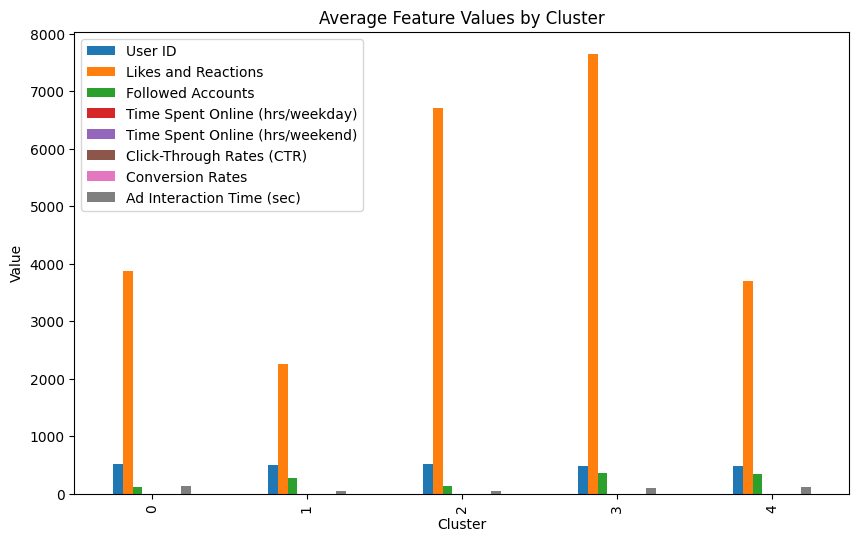

In [26]:
cluster_summary = df_clusters.groupby('Cluster').mean(numeric_only=True)
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Value')
plt.show()


- This heatmap is a standardized summary of how each user cluster differs across all your numeric and encoded categorical features.

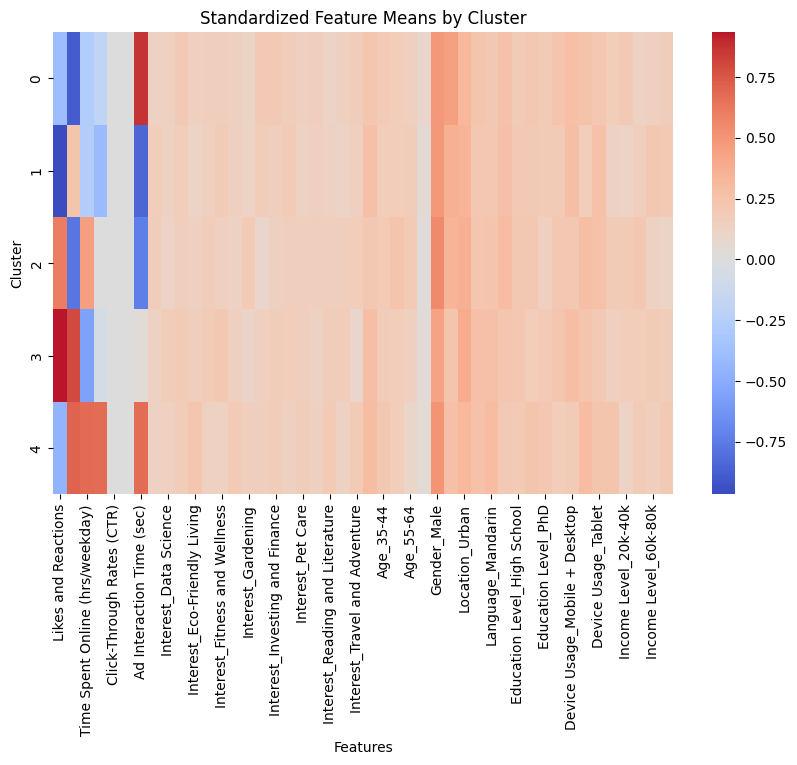

In [32]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_std, cmap='coolwarm', center=0, annot=False)
plt.title('Standardized Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()


In [33]:
feature_importance = cluster_means_std.var(axis=0).sort_values(ascending=False)
feature_importance.head(10)

,0
Followed Accounts,0.644914
Likes and Reactions,0.629691
Ad Interaction Time (sec),0.615464
Time Spent Online (hrs/weekday),0.280366
Time Spent Online (hrs/weekend),0.163831
Location_Suburban,0.006684
Device Usage_Mobile Only,0.002551
Device Usage_Mobile + Desktop,0.002048
Gender_Male,0.001868
Interest_Gourmet Cooking,0.001812
